<a href="https://colab.research.google.com/github/aduvvuri007/Breast-Cancer-Classification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Tumor Classification

In [13]:
from sklearn import datasets
import pandas as pd

In [14]:
data = datasets.load_breast_cancer()

In [15]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [16]:
# Store the feature data
X = data.data
# store the target data
y = data.target
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Determining the optimal number of neighbors for the model

The optimal number of neighbors is 10


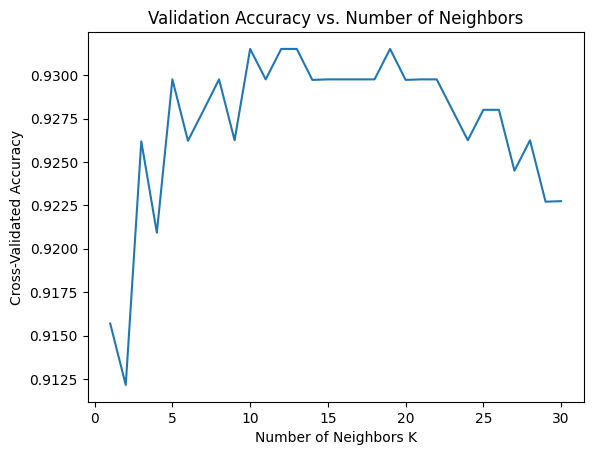

In [17]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

n_samples = X.shape[0]

# Define the range of k values to test
k_values = range(1, min(31, n_samples))  # Test up to 30 or the number of samples, whichever is smaller
cv_scores = []

# Perform 10-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k (the one with the highest mean cross-validation score)
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

# Plot the validation scores
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Validation Accuracy vs. Number of Neighbors')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
logreg = KNeighborsClassifier(n_neighbors=10)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9440559440559441

# Rerunning the model with weighted features

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model to identify important features
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = df.columns.tolist()

# Create weights based on feature importances (normalizing for practicality)
weights = importances / np.max(importances)

# Print feature importances for reference
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

# Weighted features for training set
X_train_weighted = X_train * weights

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_weighted)

# Train k-NN with weighted features
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
print(f"Cross-validated accuracy on training set: {np.mean(scores)}")

# Apply the same transformations to the test set
X_test_weighted = X_test * weights
X_test_scaled = scaler.transform(X_test_weighted)

# Evaluate the model on the test set
knn.fit(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)
print(f"Accuracy on test set: {test_accuracy}")


mean radius: 0.05045620562451859
mean texture: 0.01885857796060735
mean perimeter: 0.04656409335585341
mean area: 0.04880438605899249
mean smoothness: 0.00765112066009995
mean compactness: 0.013222813675229723
mean concavity: 0.07246913865285808
mean concave points: 0.11846152472981437
mean symmetry: 0.004620362008828828
mean fractal dimension: 0.004448151718483312
radius error: 0.016153590650197835
texture error: 0.004895757316820979
perimeter error: 0.009491761301186083
area error: 0.02541915893689145
smoothness error: 0.006288668644323994
compactness error: 0.006224886610812863
concavity error: 0.007981852781704804
concave points error: 0.004212181521452393
symmetry error: 0.004458515302494301
fractal dimension error: 0.004711087333231643
worst radius: 0.0771259387583946
worst texture: 0.02187919925777765
worst perimeter: 0.09237844935866851
worst area: 0.1390650397388717
worst smoothness: 0.010034466844900435
worst compactness: 0.01649519775527079
worst concavity: 0.040299741916009

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Create a SelectFromModel object
selector = SelectFromModel(RandomForestClassifier(n_estimators=100))

# Fit the selector
selector.fit(X_train, y_train)

# Transform the data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train a kNN model on the selected features
knn_selected = KNeighborsClassifier(n_neighbors=10)
knn_selected.fit(X_train_selected, y_train)

# Evaluate the kNN model on the selected features
y_pred_selected = knn_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy after Feature Selection: {accuracy_selected:.4f}')

Accuracy after Feature Selection: 0.9737


In [21]:
selected_indices = selector.get_support()

# Get the names of the selected features
selected_features = [data.feature_names[i] for i, selected in enumerate(selected_indices) if selected]

# Print the selected feature names
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
mean perimeter
mean area
mean concavity
mean concave points
worst radius
worst perimeter
worst area
worst concavity
worst concave points


In [22]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss

calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid', cv=5)
calibrated_knn.fit(X_train_selected, y_train)

# Predict probabilities
y_prob = calibrated_knn.predict_proba(X_test_selected)

# Evaluate the accuracy
y_pred = calibrated_knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred_selected)
logloss = log_loss(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {logloss:.4f}')

Accuracy: 0.9737
Log Loss: 0.1189
